# WeatherPy
----

### Analysis
Looking at the scatterplot for Latitude versus Maximum Temperature, we see a strong correlation between the Latitude and Temperature.  Cities with lower latitudes have higher temperatures moving towards the equator and between are between 0-20 degrees latitude.  As the latitude increases the temperatures for these cities decreases.

The correlation between Latitude versus Humidity is quite weak. The Humidity for most cities were above 40% humidity and between 10-60 degrees latitude we see some cities between 0-40% humidity.

There was no significant correlation between the Latitude and Cloudiness of the cities. As we observe the scatterplot for Latitude versus Wind Speed, across the latitude most cities have a Wind Speed range between 0 – 8mph.



In [40]:
# Dependencies and Setup
import csv
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import random
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [41]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

In [42]:
#url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city=city.replace(' ', '%20')
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
newcities= [x.replace(' ', '%20')for x in cities]



city='aitape'
query_url = f"{url}&q={city}&unit={units}&appid={api_key}"
response = req.get(query_url).json()
print(response)
print(query_url)

{'coord': {'lon': 142.36, 'lat': -3.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 299.582, 'pressure': 1011.51, 'humidity': 84, 'temp_min': 299.582, 'temp_max': 299.582, 'sea_level': 1011.51, 'grnd_level': 1001.5}, 'wind': {'speed': 0.73, 'deg': 229.117}, 'rain': {'3h': 0.688}, 'clouds': {'all': 100}, 'dt': 1556929436, 'sys': {'message': 0.005, 'country': 'PG', 'sunrise': 1556915247, 'sunset': 1556958435}, 'id': 2101169, 'name': 'Aitape', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?&q=aitape&unit=imperial&appid=8fdb78f2147ecd7be1fbda3e5b1896e1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
#create an empty list to store data (columns)
name = []
clouds = []
country = []
dt = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
record=0

In [45]:
#Perform a weather check on each city using a series of succesive API calls
#start with weathermap API call
query_url = f"{url}&q={city}&unit={units}&appid={api_key}"




print(f"Begining Data Retrieval")
print(f"------------------------------")

#loop through the city from the cities list
for city in cities:
    try:
        query_url = f"{url}&q={city}&unit={units}&appid={api_key}"
        response = req.get(query_url).json()
        name.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        dt.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        #max_temp.append((((weather_response["main"]["temp_max"])-273.15) * 9/5) + 32)
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {city_record} | {city}")
        print(f"{city}")
    
    #delay one second in loop to not exceed API rate limit
        time.sleep(random.choice(1))
    
    #Increase counter by 1
        record += 1
    
    #if not record is found skip to next call
    except:
        if city not in cities:
            print("City not found. Skipping...")
            continue

Begining Data Retrieval
------------------------------
Processing Record Bandarbeyla | bandarbeyla
bandarbeyla
Processing Record Yumen | yumen
yumen
Processing Record Waitati | waitati
waitati
Processing Record Leningradskiy | leningradskiy
leningradskiy
Processing Record Solnechnyy | solnechnyy
solnechnyy
Processing Record Cockburn Town | cockburn%20town
cockburn%20town
Processing Record Norman Wells | norman%20wells
norman%20wells
Processing Record Albany | albany
albany
Processing Record Khatanga | khatanga
khatanga
Processing Record Torbay | torbay
torbay
Processing Record Cap-aux-Meules | cap-aux-meules
cap-aux-meules
Processing Record Jamestown | jamestown
jamestown
Processing Record Arkadelphia | arkadelphia
arkadelphia
Processing Record Ribeira Grande | ribeira%20grande
ribeira%20grande
Processing Record Busselton | busselton
busselton
Processing Record Chicama | chicama
chicama
Processing Record New Norfolk | new%20norfolk
new%20norfolk
Processing Record Rikitea | rikitea
riki

Processing Record Biak | biak
biak
Processing Record Nambucca Heads | nambucca%20heads
nambucca%20heads
Processing Record Mizdah | mizdah
mizdah
Processing Record Airai | airai
airai
Processing Record Laguna | laguna
laguna
Processing Record Matara | matara
matara
Processing Record Akcakoca | akcakoca
akcakoca
Processing Record Sambava | sambava
sambava
Processing Record Batemans Bay | batemans%20bay
batemans%20bay
Processing Record Redlands | redlands
redlands
Processing Record Monywa | monywa
monywa
Processing Record Beloha | beloha
beloha
Processing Record Manzil Salim | manzil%20salim
manzil%20salim
Processing Record Leesburg | leesburg
leesburg
Processing Record Guerrero Negro | guerrero%20negro
guerrero%20negro
Processing Record Yellowknife | yellowknife
yellowknife
Processing Record Young | young
young
Processing Record Mednogorsk | mednogorsk
mednogorsk
Processing Record Tilichiki | tilichiki
tilichiki
Processing Record Yatou | yatou
yatou
Processing Record Tazovskiy | tazovski

Processing Record Hanna | hanna
hanna
Processing Record Gazli | gazli
gazli
Processing Record Lao Cai | lao%20cai
lao%20cai
Processing Record Aykhal | aykhal
aykhal
Processing Record Victor Harbor | victor%20harbor
victor%20harbor
Processing Record Puquio | puquio
puquio
Processing Record Ahipara | ahipara
ahipara
Processing Record Wukari | wukari
wukari
Processing Record Toktogul | toktogul
toktogul
Processing Record Palimbang | palimbang
palimbang
Processing Record Kizema | kizema
kizema
Processing Record Paracatu | paracatu
paracatu
Processing Record Hami | hami
hami
Processing Record Walvis Bay | walvis%20bay
walvis%20bay
Processing Record Kaili | kaili
kaili
Processing Record Ipixuna | ipixuna
ipixuna
Processing Record Mgandu | mgandu
mgandu
Processing Record Lomianki | lomianki
lomianki
Processing Record Klaksvik | klaksvik
klaksvik
Processing Record Emerald | emerald
emerald
Processing Record Lorengau | lorengau
lorengau
Processing Record Sisimiut | sisimiut
sisimiut
Processing 

Processing Record Zyryanka | zyryanka
zyryanka
Processing Record Mapiripan | mapiripan
mapiripan
Processing Record Acajutla | acajutla
acajutla
Processing Record Skelleftea | skelleftea
skelleftea
Processing Record Gamba | gamba
gamba
Processing Record Vershino-Darasunskiy | vershino-darasunskiy
vershino-darasunskiy
Processing Record Kinnelon | kinnelon
kinnelon
Processing Record Araouane | araouane
araouane
Processing Record Krasnoborsk | krasnoborsk
krasnoborsk
Processing Record Fukue | fukue
fukue
Processing Record Hovd | hovd
hovd
Processing Record Jieshi | jieshi
jieshi
Processing Record Waingapu | waingapu
waingapu
Processing Record Bloemfontein | bloemfontein
bloemfontein
Processing Record Dusti | dusti
dusti
Processing Record Batagay | batagay
batagay
Processing Record Ashland | ashland
ashland
Processing Record Vahan | vahan
vahan
Processing Record Aginskoye | aginskoye
aginskoye
Processing Record Ciro Marina | ciro%20marina
ciro%20marina
Processing Record Ismailia | ismailia


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [59]:
city_weather = pd.DataFrame(list(zip(name, clouds, country, dt, humidity, lat, lon, max_temp, wind_speed)),
              columns =['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
city_weather['Temp in Imperial']=(city_weather['Max Temp']-273.15)*9/5+32

In [60]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temp in Imperial
0,Bandarbeyla,0,SO,1556929475,82,9.49,50.81,298.752,3.04,78.0836
1,Yumen,100,CN,1556929476,22,40.29,97.04,292.122,10.07,66.1496
2,Waitati,95,NZ,1556929234,67,-45.75,170.57,286.480,2.24,55.9940
3,Leningradskiy,14,RU,1556929476,82,69.38,178.42,272.322,3.79,30.5096
4,Solnechnyy,96,RU,1556929476,39,50.72,136.64,288.022,4.07,58.7696


In [48]:
#Clean data
city_weather.dropna()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bandarbeyla,0,SO,1556929475,82,9.49,50.81,298.752,3.04
1,Yumen,100,CN,1556929476,22,40.29,97.04,292.122,10.07
2,Waitati,95,NZ,1556929234,67,-45.75,170.57,286.480,2.24
3,Leningradskiy,14,RU,1556929476,82,69.38,178.42,272.322,3.79
4,Solnechnyy,96,RU,1556929476,39,50.72,136.64,288.022,4.07
5,Cockburn Town,51,TC,1556929476,80,21.46,-71.14,299.602,9.58
6,Norman Wells,20,CA,1556928000,53,65.28,-126.83,269.150,3.10
7,Albany,90,US,1556929265,87,42.65,-73.75,287.590,3.60
8,Khatanga,54,RU,1556929477,91,71.98,102.47,263.892,1.69
9,Torbay,90,CA,1556929406,89,47.66,-52.73,276.150,8.70


In [61]:
#Export city data into a .csv
city_weather.to_csv("Weatherpy_Output.csv")

In [62]:
city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Temp in Imperial
0,Bandarbeyla,0,SO,1556929475,82,9.49,50.81,298.752,3.04,78.0836
1,Yumen,100,CN,1556929476,22,40.29,97.04,292.122,10.07,66.1496
2,Waitati,95,NZ,1556929234,67,-45.75,170.57,286.480,2.24,55.9940
3,Leningradskiy,14,RU,1556929476,82,69.38,178.42,272.322,3.79,30.5096
4,Solnechnyy,96,RU,1556929476,39,50.72,136.64,288.022,4.07,58.7696
5,Cockburn Town,51,TC,1556929476,80,21.46,-71.14,299.602,9.58,79.6136
6,Norman Wells,20,CA,1556928000,53,65.28,-126.83,269.150,3.10,24.8000
7,Albany,90,US,1556929265,87,42.65,-73.75,287.590,3.60,57.9920
8,Khatanga,54,RU,1556929477,91,71.98,102.47,263.892,1.69,15.3356
9,Torbay,90,CA,1556929406,89,47.66,-52.73,276.150,8.70,37.4000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

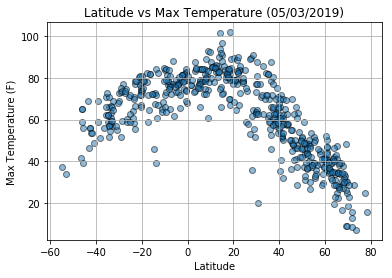

In [64]:
plt.scatter(city_weather["Lat"], city_weather["Temp in Imperial"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature (05/03/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvstempCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

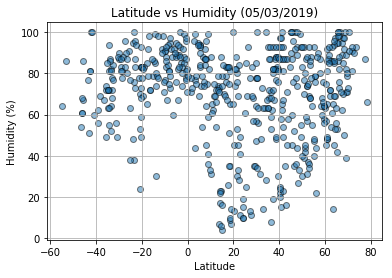

In [55]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (05/03/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvshumidityCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

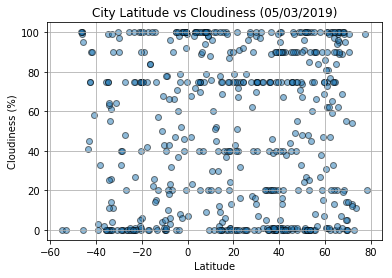

In [57]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (05/03/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvscloudinessCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

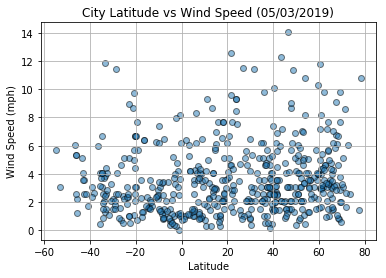

In [58]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o",alpha=.5,edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (05/03/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatvswindspeedCities.png")

# Show plot
plt.show()